## Cable Stay Tensioning Calculation

In [6]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

In [7]:
# Initial data

Zk=1200  #kN
dv=15.98  #mm
theta=53.3 #degree
lk = 60000 #mm
Xik =60 #mm
KO = Xik/Zk #mm/kN
Eu = 194000 #MPa
Au = 150 #mm^2
nos = 12



# Display the value of x_k using Markdown syntax
display(Markdown("### Cable Data Input"))
display(Markdown(rf" - Designated jacking force,  $Z_k$ is {Zk} kN"))
display(Markdown(rf"- Shortening of cable axis, obtained from bridge design model,  $\xi_k$ is {Xik} mm."))
display(Markdown(rf"- Cable shortening to force ratio, $K_0$ is {KO} mm/kN."))
display(Markdown(rf"- Cable modulus of elasticity, $E_u$ is {Eu} MPa."))
display(Markdown(rf"- Cable section area, $A_u$ is {Au} $mm^2$."))
display(Markdown(rf"- Number of strand , {nos} strand."))


### Cable Data Input

 - Designated jacking force,  $Z_k$ is 1200 kN

- Shortening of cable axis, obtained from bridge design model,  $\xi_k$ is 60 mm.

- Cable shortening to force ratio, $K_0$ is 0.05 mm/kN.

- Cable modulus of elasticity, $E_u$ is 194000 MPa.

- Cable section area, $A_u$ is 150 $mm^2$.

- Number of strand , 12 strand.

In [96]:
def force_drop(strand, strand_jacking_load,current_length,total_shortening, total_force):
    current_length=lk-total_shortening
    strain_force_ratio=KO*Eu*Au/(current_length*1000)
    strand_shortening=KO*strand_jacking_load/(1+(strand-1)*strain_force_ratio)
    total_shortening=strand_shortening+total_shortening
    total_force=strand_jacking_load/(1+(strand-1)*strain_force_ratio)+total_force

    return strain_force_ratio, strand_shortening,total_shortening, current_length, total_force

def cycle_load_reading(final_shortening,total_shortening,strand_jacking_load):
    strand_partial_shortening=final_shortening-total_shortening
    drop_force=strand_partial_shortening*Eu*Au/(lk-total_shortening)/1000
    reduced_force=strand_jacking_load-drop_force

    return strand_partial_shortening, drop_force, reduced_force

def perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force, initial_jacking_loads):

    # Initialize lists to compile results

    strain_force_ratio_list = []
    strand_shortening_list = []
    total_shortening_list = []
    current_length_list = []
    total_force_list = []

    #Calculation of accumulated shortening and total force
    for strand in range(1,len(strand_jacking_loads)+1):
        # Access the jacking load for the current strand index
        strand_jacking_load = strand_jacking_loads[strand - 1]
    
        # Perform force drop calculation for the current strand
        strain_force_ratio, strand_shortening, total_shortening, current_length,    total_force = force_drop(
            strand, strand_jacking_load, current_length, total_shortening,  total_force
        )
        
        # Append results to lists
        strain_force_ratio_list.append(strain_force_ratio)
        strand_shortening_list.append(strand_shortening)
        total_shortening_list.append(total_shortening)
        current_length_list.append(current_length)
        total_force_list.append(total_force)
    
    # print(len(total_shortening_list))
    strand_partial_shortening_list = []
    drop_force_list = []
    reduced_force_list = []

    #Colculating Drop Force and Residual Force
    for strand in range(1,len(initial_jacking_loads)+1):
        #Access the final shortening
        final_shortening=total_shortening_list[-1]

        #Access the total shortening list and strand jacking load 
        total_shortening=total_shortening_list[strand- 1]
        strand_jacking_load=initial_jacking_loads[strand - 1]

        strand_partial_shortening, drop_force, reduced_force = cycle_load_reading(final_shortening,total_shortening,strand_jacking_load) 

        #append result to List 
        strand_partial_shortening_list.append(strand_partial_shortening)
        drop_force_list.append(drop_force)
        reduced_force_list.append(reduced_force)

    return drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list

def tensioning_simulation(cycle_number,strand_jacking_loads,current_length,total_shortening,total_force,initial_jacking_loads):

    for i in range(cycle_number):
        drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list=perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force,initial_jacking_loads)

        #Extracting previous tension result for the next tensioning cycle
        strand_jacking_loads = drop_force_list
        current_length=current_length_list[-1]
        total_shortening=total_shortening_list[-1]
        total_force=total_force_list[-1]

    return reduced_force_list,drop_force_list,current_length_list, total_shortening_list



    

In [97]:
# Calculate strand jacking load
strand_tensioning = Zk / nos

# Create a list of strand jacking loads
initial_jacking_loads = [strand_tensioning] * nos
strand_jacking_loads=initial_jacking_loads

#initial input
current_length=lk
total_shortening=0
total_force=0
cycle_number = 4

# drop_force_list, current_length_list, total_shortening_list, total_force_list,reduced_force_list= perform_cycle_tension(strand_jacking_loads,current_length,total_shortening,total_force)

# print(current_length_list)
# print(drop_force_list)
# print(total_shortening_list)
# print(total_force_list)
# print(reduced_force_list)


reduced_force_list,drop_force_list,current_length_list, total_shortening_list=tensioning_simulation(cycle_number,strand_jacking_loads,current_length,total_shortening,total_force, initial_jacking_loads)

print(reduced_force_list)
print(drop_force_list)
print(current_length_list)
print(total_shortening_list)




[99.99324851468445, 99.9958939714905, 99.99764351491199, 99.99874673533347, 99.99939964468399, 99.99975330589346, 99.99992109876143, 99.99998484808931, 100.0, 100.0, 100.0, 100.0]
[0.00675148531555324, 0.004106028509494107, 0.0023564850880103878, 0.0012532646665286051, 0.0006003553160081252, 0.00024669410653481455, 7.890123857299133e-05, 1.5151910693375659e-05, 0.0, 0.0, 0.0, 0.0]
[59940.02425699717, 59940.01631688373, 59940.01086778591, 59940.00726408625, 59940.00499167928, 59940.00364682049, 59940.002918351274, 59940.00257273254, 59940.00244142207, 59940.002410212255, 59940.002410212255, 59940.002410212255]
[59.98368311626896, 59.98913221408666, 59.99273591374953, 59.99500832072291, 59.99635317950424, 59.997081648726414, 59.99742726745571, 59.99755857793266, 59.99758978774585, 59.99758978774585, 59.99758978774585, 59.99758978774585]


In [8]:
# Display the value of x_k using Markdown syntax
display(Markdown("### First cycle of strand tensioning"))
display(Markdown(rf" - Length of cable axis prior to tensioning of the i-th strand, $l_k,i = l_k - \xi_{{k,i-1}}$"))
display(Markdown(rf" - Strain to force ratio, $\eta_i = \dfrac{{K_0 \cdot E_u \cdot A_u}}{{l_{{k,i}}}}$"))



### First cycle of strand tensioning

 - Length of cable axis prior to tensioning of the i-th strand, $l_k,i = l_k - \xi_{k,i-1}$

 - Strain to force ratio, $\eta_i = \dfrac{K_0 \cdot E_u \cdot A_u}{l_{k,i}}$

In [43]:

# Calculate strand jacking load
strand_tensioning = Zk / nos

# Create a list of strand jacking loads
strand_jacking_loads = [strand_tensioning] * nos
# Print the list of strand jacking loads
# print("Strand Jacking Load List:", strand_jacking_loads)

#initial input
current_length=lk
total_shortening=0
total_force=0

# Initialize lists to compile results

strain_force_ratio_list = []
strand_shortening_list = []
total_shortening_list = []
current_length_list = []
total_force_list = []

#Calculation of accumulated shortening and total force
for strand in range(1,nos+1):
    # Access the jacking load for the current strand index
    strand_jacking_load = strand_jacking_loads[strand - 1]


    # Perform force drop calculation for the current strand
    strain_force_ratio, strand_shortening, total_shortening, current_length, total_force = force_drop(
        strand, strand_jacking_load, current_length, total_shortening, total_force
    )
    
    # Append results to lists
    strain_force_ratio_list.append(strain_force_ratio)
    strand_shortening_list.append(strand_shortening)
    total_shortening_list.append(total_shortening)
    current_length_list.append(current_length)
    total_force_list.append(total_force)

print(strand_jacking_loads)
print(current_length_list)
print(strain_force_ratio_list)
print(strand_shortening_list)
print(total_shortening_list)
print(total_force_list)



strand_partial_shortening_list = []
drop_force_list = []
reduced_force_list = []

#Colculating Drop Force and Residual Force
for strand in range(1,nos+1):
    #Access the final shortening
    final_shortening=total_shortening_list[nos-1]

    #Access the total shortening list and strand jacking load 
    total_shortening=total_shortening_list[strand - 1]
    strand_jacking_load=strand_jacking_loads[strand - 1]

    strand_partial_shortening, drop_force, reduced_force = cycle_load_reading(final_shortening,total_shortening,strand_jacking_load) 

    #append result to List 
    strand_partial_shortening_list.append(strand_partial_shortening)
    drop_force_list.append(drop_force)
    reduced_force_list.append(reduced_force)

print("===============")
print(strand_partial_shortening_list)
print(drop_force_list)
print(reduced_force_list)


# # Iterate over each element in the list and format them individually
# formatted_strand_jacking_loads = [f"{value:.2f}" for value in strand_jacking_loads]
# formatted_current_length_list = [f"{value:.2f}" for value in current_length_list]
# formatted_strain_force_ratio_list = [f"{value:.2f}" for value in strain_force_ratio_list]
# formatted_strand_shortening_list = [f"{value:.2f}" for value in strand_shortening_list]
# formatted_total_shortening_list = [f"{value:.2f}" for value in total_shortening_list]
# formatted_total_force_list = [f"{value:.2f}" for value in total_force_list]

# # Print the formatted lists
# print("Formatted Strand Jacking Loads:", formatted_strand_jacking_loads)
# print("Formatted Current Length List:", formatted_current_length_list)
# print("Formatted Strain Force Ratio List:", formatted_strain_force_ratio_list)
# print("Formatted Strand Shortening List:", formatted_strand_shortening_list)
# print("Formatted Total Shortening List:", formatted_total_shortening_list)
# print("Formatted Total Force List:", formatted_total_force_list)

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[60000, 59995.0, 59985.11838893409, 59970.46811537692, 59951.157079267454, 59927.288486339654, 59898.96116962162, 59866.26988176453, 59829.30556145686, 59788.155576751626, 59742.90394777046, 59693.631550938444]
[0.02425, 0.024252021001750147, 0.024256016143304217, 0.02426194168104094, 0.024269756763429906, 0.024279423226893793, 0.024290905411192977, 0.024304169992110998, 0.024319185829516594, 0.024335923829129972, 0.02435435681653535, 0.024374459422164707]
[5.0, 4.881611065907242, 4.768662491260054, 4.660762552300702, 4.557556818334081, 4.45872379022637, 4.363971139063059, 4.273032450575795, 4.185664397565001, 4.101644275939044, 4.020767850841517, 3.9428474681718613]
[5.0, 9.881611065907242, 14.650273557167296, 19.311036109468, 23.86859292780208, 28.32731671802845, 32.69128785709151, 36.96432030766731, 41.149984705232306, 45.25162898117135, 49.272396832012866, 53.21524430018473]
[100.0, 197.63222131814

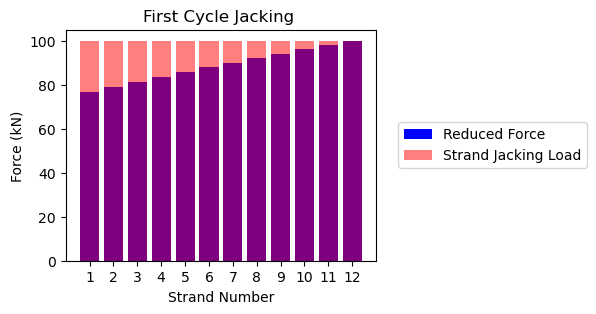

In [6]:
# Generate x-axis values (strand numbers)
strand_numbers = list(range(1, len(reduced_force_list) + 1))

# Set the style to a dark theme
# plt.style.use('dark_background')
plt.style.use('default')

# Set the desired figure size
plt.figure(figsize=(4, 3))  # Adjust width and height as needed

# Create bar chart
plt.bar(strand_numbers, reduced_force_list, label='Reduced Force', color='blue')
plt.bar(strand_numbers, strand_jacking_loads, label='Strand Jacking Load', color='red', alpha=0.5)

# Add labels and title
plt.xlabel('Strand Number')
plt.ylabel('Force (kN)')
plt.title('First Cycle Jacking ')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')

# Set tick positions and labels for x-axis
plt.xticks(strand_numbers, strand_numbers)

# Show plot

plt.show()